# Flow of the project
## 1. Data Cleaning
## 2. EDA
## 3. Text Preprocessing
## 4. Model Building
## 5. Improvement
## 6. Developing Website
## 7. Deployment 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
425,ham,Ok. She'll be ok. I guess,NaN,NaN,NaN
3029,ham,"Also sir, i sent you an email about how to log...",NaN,NaN,NaN
3856,ham,No! But we found a diff farm shop to buy some ...,NaN,NaN,NaN
3686,ham,Great! I shoot big loads so get ready!,NaN,NaN,NaN
1303,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
5448,ham,"aight we can pick some up, you open before ton...",NaN,NaN,NaN
3374,ham,:),NaN,NaN,NaN
2439,ham,Rightio. 11.48 it is then. Well arent we all u...,NaN,NaN,NaN
5148,ham,K..then come wenever u lik to come and also te...,NaN,NaN,NaN
5532,ham,happened here while you were adventuring,NaN,NaN,NaN


## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Dropping the last 3 columns
df.drop(columns = ['Unnamed: 4', 'Unnamed: 3', 'Unnamed: 2'], inplace = True)

In [7]:
df.sample(10)

,v1,v2
1857,ham,I hate when she does this. She turns what shou...
2910,ham,"Sorry,in meeting I'll call later"
4911,ham,I am on the way to tirupur.
3716,ham,I'm gonna rip out my uterus.
1630,ham,I am going to film 2day da. At 6pm. Sorry da.
1427,ham,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...
2006,ham,Shopping lor. Them raining mah hard 2 leave or...
681,ham,�� log off 4 wat. It's sdryb8i
2299,spam,Congrats! 1 year special cinema pass for 2 is ...
3613,ham,Ok c �_ then.


In [8]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(10)

,target,text
838,spam,We tried to contact you re our offer of New Vi...
4269,ham,Great. Hope you are using your connections fro...
751,spam,You have an important customer service announc...
1973,ham,I had askd u a question some hours before. Its...
3047,ham,Die... Now i have e toot fringe again...
315,ham,K.k:)advance happy pongal.
293,ham,Are you this much buzy
505,ham,No it's waiting in e car dat's bored wat. Cos ...
1307,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
3522,ham,Try neva mate!!


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicates
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

## 2. EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

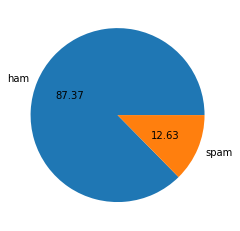

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [20]:
# the data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KUSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# non spam
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

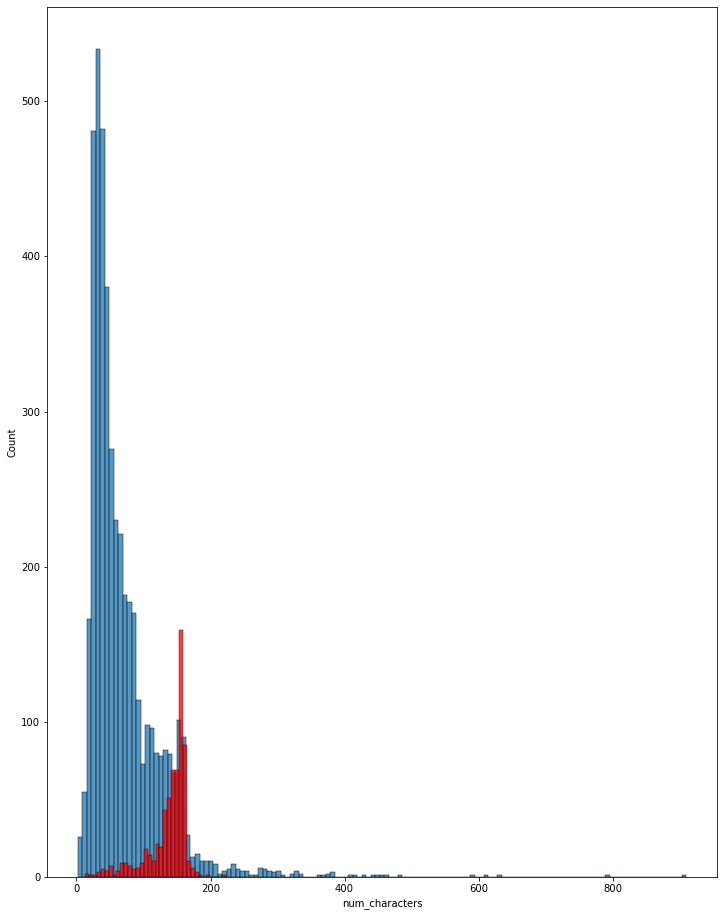

In [33]:
plt.figure(figsize=(12,16))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

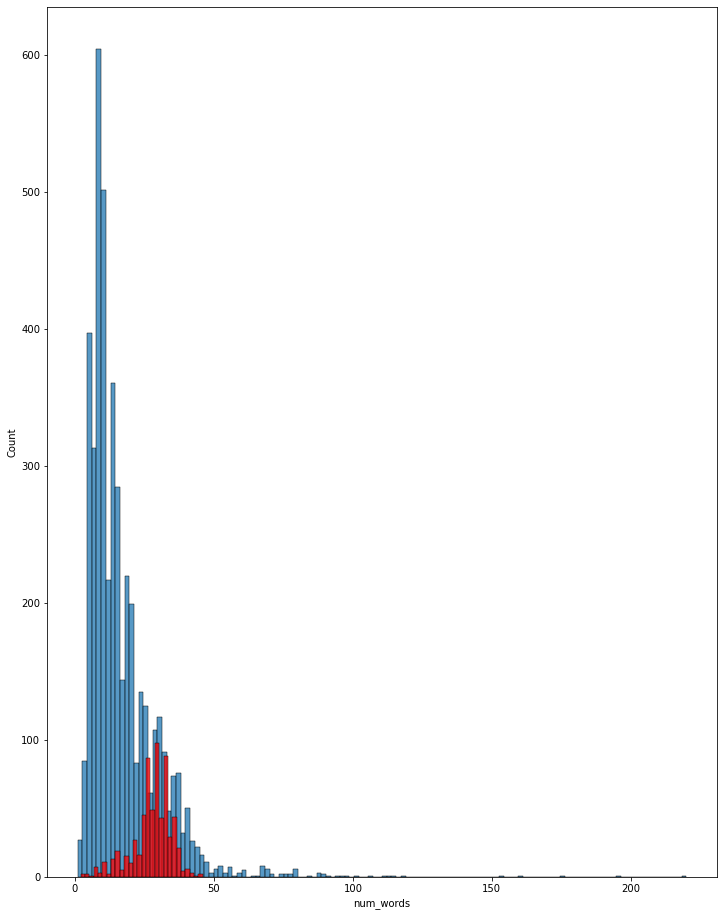

In [34]:
plt.figure(figsize=(12,16))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color = 'red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

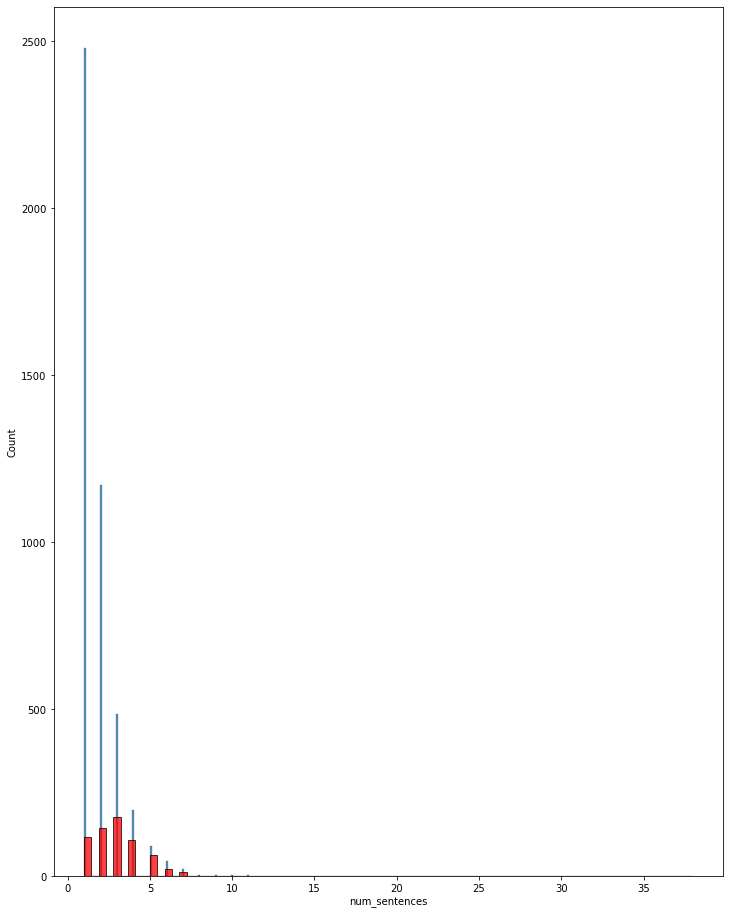

In [35]:
plt.figure(figsize=(12,16))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color = 'red')

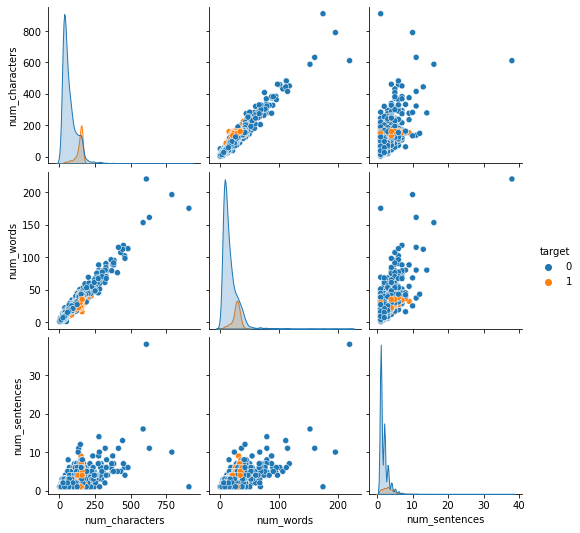

In [36]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

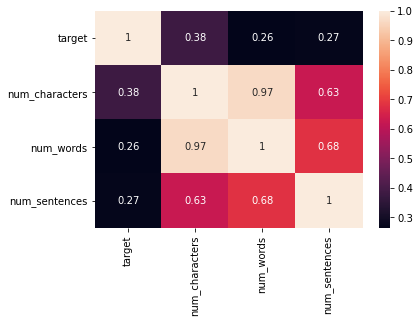

In [37]:
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing
 - Lower Case
 - Tokenization
 - Removing special characters
 - Removing stop words and punctuation 
 - Stemming

In [38]:
from nltk import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

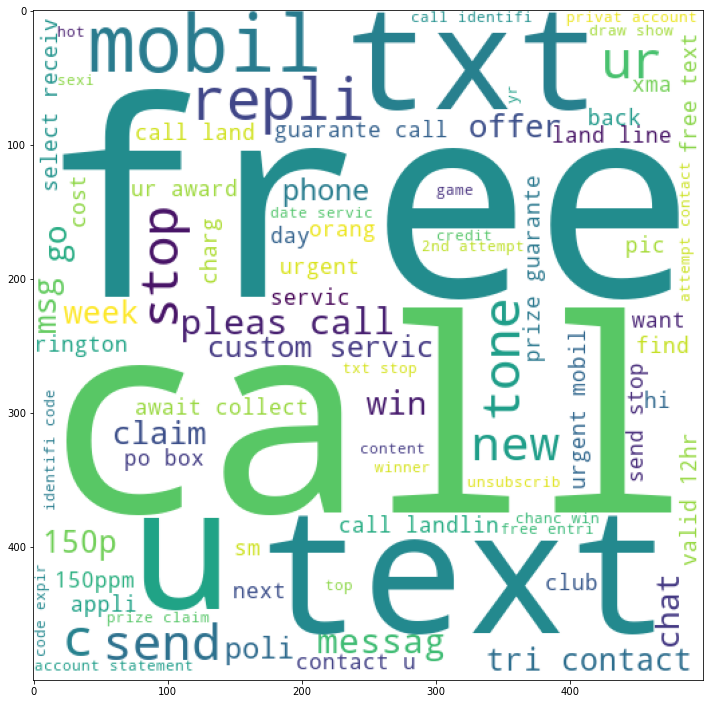

In [46]:
plt.figure(figsize=(12,16))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

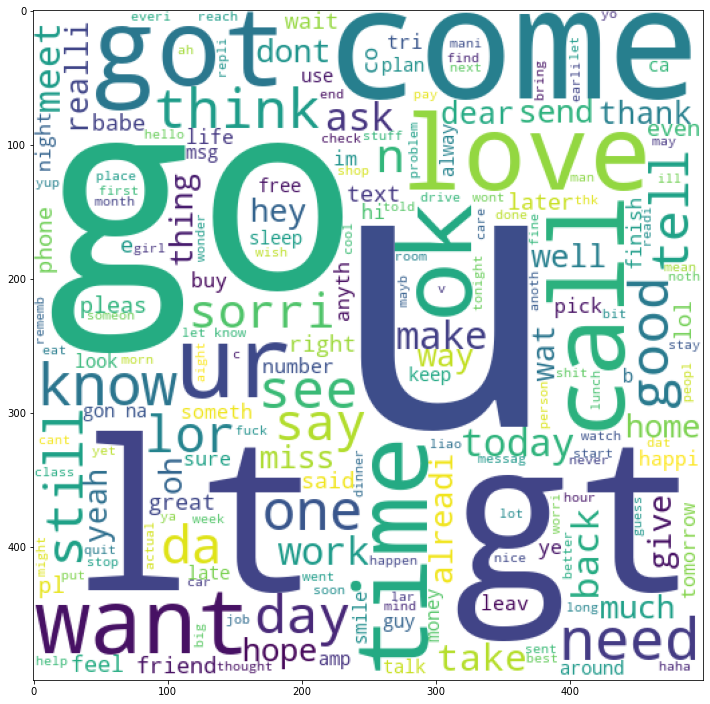

In [48]:
plt.figure(figsize=(12,16))
plt.imshow(ham_wc)

In [49]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
from collections import Counter

C:\Users\KUSHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


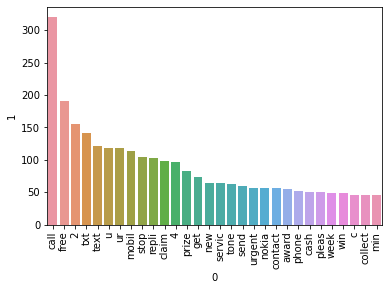

In [51]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\KUSHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


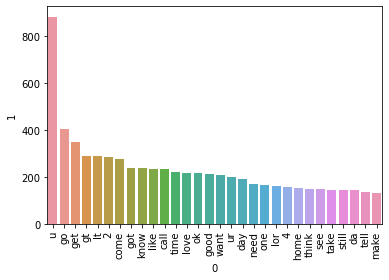

In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# # appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [66]:
# tfidf --> MNB

In [67]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [68]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }


In [70]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [71]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [72]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [73]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
# performance_df

In [75]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [76]:
# performance_df1

In [77]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [78]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [79]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [80]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [81]:
# new_df = performance_df.merge(temp_df,on='Algorithm')

In [82]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [83]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [84]:
# new_df_scaled.merge(temp_df,on='Algorithm')

In [85]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# bnb = BernoulliNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [86]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [87]:
# voting.fit(X_train,y_train)

In [88]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [89]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

In [90]:
# from sklearn.ensemble import StackingClassifier

In [91]:
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [92]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [93]:
# import pickle

In [94]:
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(mnb, open('model.pkl', 'wb'))